In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
salary_data = pd.read_csv('salary.csv')
salary_meta = pd.read_csv('Salary metadata.csv', sep=';')

In [3]:
salary_data.head(10)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
5,56000.0,1,0,0,1.19,1,0,1,1,1,0
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
7,39986.0,0,2,0,0.99,1,0,1,1,4,0
8,36308.0,0,2,1,0.85,1,0,1,1,1,1
9,55000.0,0,0,0,1.23,1,0,1,1,1,1


In [4]:
display(salary_meta)

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [5]:
display(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


None

In [6]:
salary_data = salary_data.dropna()

In [7]:
salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


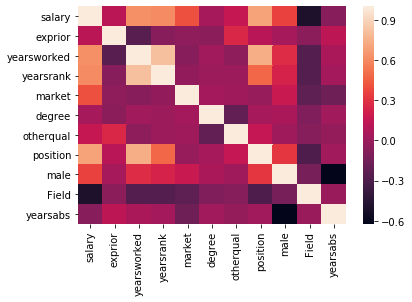

In [8]:
correalation_map = sns.heatmap(salary_data.corr())

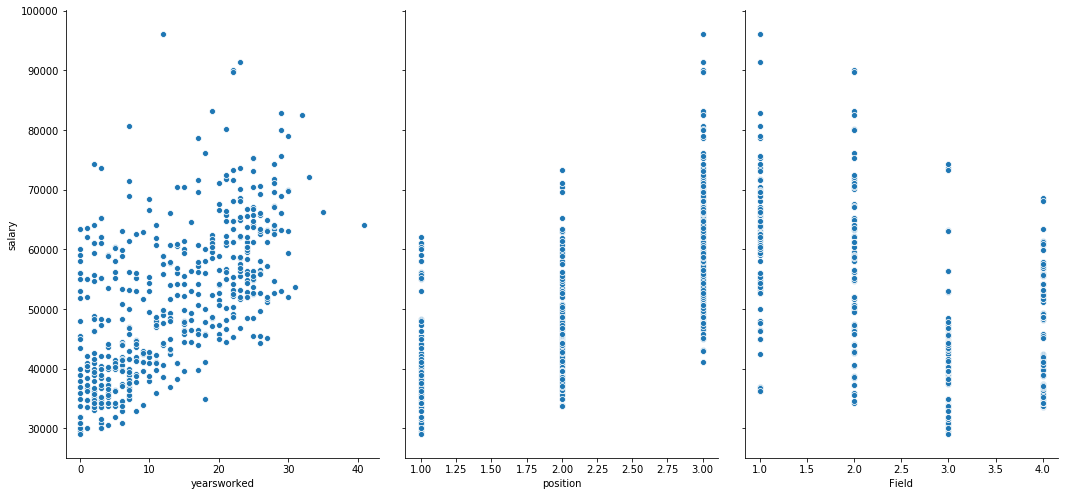

In [9]:
sns.pairplot(salary_data, x_vars=['yearsworked','position','Field'], y_vars='salary',height=7, aspect=0.7, kind='scatter')
# Make a boxplot

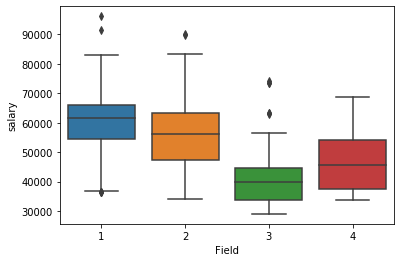

In [10]:
sns.boxplot(data = salary_data, x='Field', y='salary')

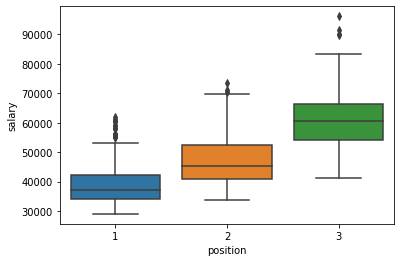

In [11]:
sns.boxplot(data = salary_data, x='position', y='salary')

In [12]:
fields = pd.get_dummies(salary_data.Field, prefix = 'Field')

In [13]:
fields = fields.rename(columns={"Field_1": "Engineering", "Field_2": "Finance", "Field_3":"Human Resources", "Field_4": "Marketing"})

fields.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [14]:
dataframes = [salary_data, fields]
salary_merged = pd.concat(dataframes, axis=1)
salary_merged.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1


In [15]:
salary_merged.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630,0.426059,0.231626,-0.435815,-0.216884
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022,0.053511,0.001509,-0.041037,-0.013669
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113,0.218146,0.151929,-0.267442,-0.100326
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962,0.198489,0.170245,-0.241413,-0.124460
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177,0.198321,0.120408,-0.250358,-0.066834
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447,0.084197,0.034974,-0.063472,-0.054448
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792,0.029562,0.095212,-0.079855,-0.043909
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521,0.262830,0.141211,-0.306571,-0.095280
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058,0.151101,0.025520,-0.162851,-0.013460
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778,-0.773769,-0.266817,0.240135,0.782461


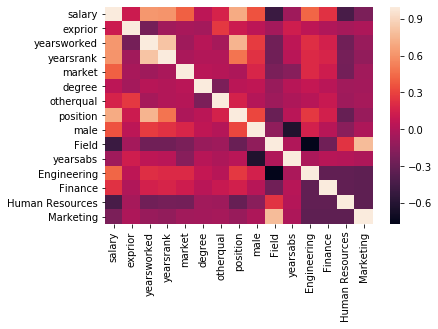

In [16]:
correalation_new = sns.heatmap(salary_merged.corr())

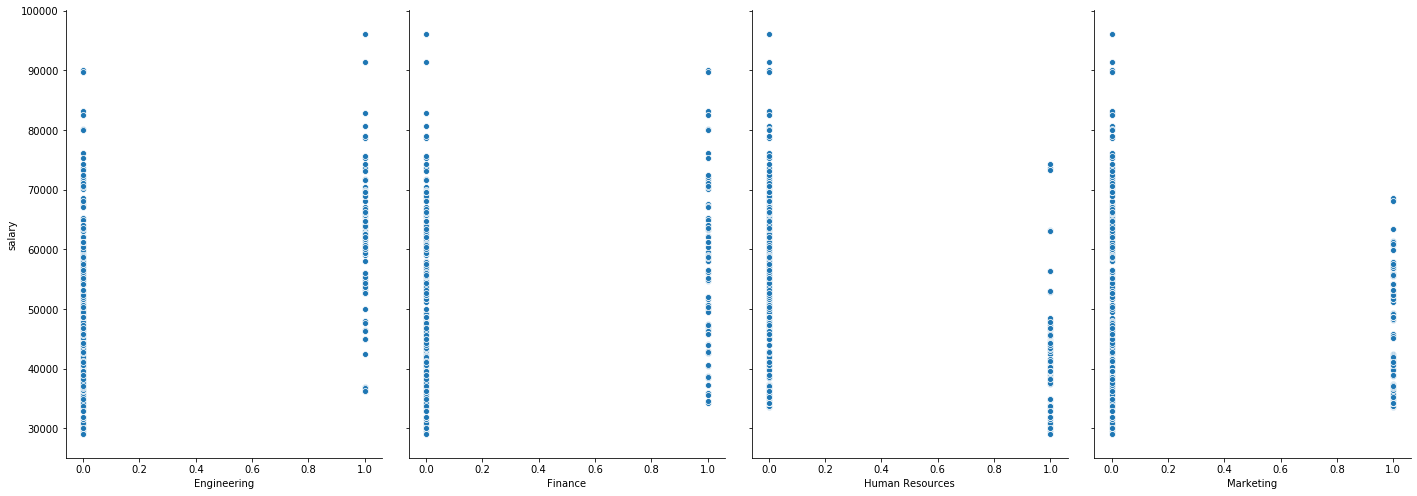

In [17]:
sns.pairplot(salary_merged, x_vars=['Engineering','Finance','Human Resources', 'Marketing'], y_vars='salary',height=7, aspect=0.7, kind='scatter')

In [26]:
salary_final = salary_merged.drop(['Field','exprior','market','degree','otherqual','male','yearsabs'], axis = 1)

In [27]:
salary_final.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,1,0,0,1,0
1,58000.0,0,0,1,0,1,0,0
2,45500.0,0,0,1,0,0,1,0
3,35782.0,2,1,1,0,0,0,1
4,34731.0,2,2,1,0,0,0,1


In [33]:
positions = pd.get_dummies(salary_data.position, prefix = 'Position')
positions = positions.rename(columns={"Position_1": "Junior Employee", "Position_2": "Manager", "Position_3":"Executive"})

positions.tail()

,Junior Employee,Manager,Executive
509,0,1,0
510,0,0,1
511,0,0,1
512,0,0,1
513,0,0,1


In [34]:
new_dataframes = [salary_merged, positions]
new_dataframes = pd.concat(new_dataframes, axis=1)
new_dataframes.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [37]:
final_Data = new_dataframes.drop(['Field','exprior','position','market','degree','otherqual','male','yearsabs'], axis = 1)
final_Data.head()

,salary,yearsworked,yearsrank,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,0,1,0,1,0,0
1,58000.0,0,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,0,1,0,1,0,0
3,35782.0,2,1,0,0,0,1,1,0,0
4,34731.0,2,2,0,0,0,1,1,0,0


In [56]:
# Manage_engineers = final_Data[final_Data[['Engineering']] == 1]
# Manage_engineers.tail()

In [20]:
model = LinearRegression()

In [21]:
X = salary_final.drop(['salary','position','yearsrank'], axis = 1)
y = salary_final.salary

In [22]:
X.head(10)

,yearsworked,Engineering,Finance,Human Resources
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,2,0,0,0
4,2,0,0,0
5,0,1,0,0
6,2,0,1,0
7,2,0,0,0
8,2,1,0,0
9,0,1,0,0


In [23]:
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(410, 4) (103, 4) (410,) (103,)


In [24]:
import statsmodels.api as sm

model_new = sm.OLS(y_train, X_train)
results = model_new.fit()

#print (results.rsquared)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              681.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                   1.48e-178
Time:                        08:52:39   Log-Likelihood:                         -4611.3
No. Observations:                 410   AIC:                                      9231.
Df Residuals:                     406   BIC:                                      9247.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yearsworked      1672.5497     89.607     18.665      0.000    1496.398    1848.702
Engineering      3.138e+04   2416.317     12.987      0.000    2.66e+04    3.61e+04
Finance          3.072e+04   2349.990     13.072      0.000    2.61e+04    3.53e+04
Human Resources  2.772e+04   1912.092     14.499      0.000     2.4e+04    3.15e+04
==============================================================================
Omnibus:                       19.241   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.435
Skew:                           0.415   Prob(JB):                     0.000270
Kurtosis:                       2.476   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
x_train = sm.add_constant(X_train.values)
model_cons = sm.OLS(y_train, x_train)
results_cons = model_cons.fit()

#print (results.rsquared)
results_cons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     146.8
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.85e-77
Time:                        10:29:31   Log-Likelihood:                -4263.8
No. Observations:                 410   AIC:                             8538.
Df Residuals:                     405   BIC:                             8558.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.823e+04    900.746     42.444      0.000    3.65e+04       4e+04
x1           679.6103     44.997     15.103      0.000     591.153     768.067
x2          9928.8627   1153.161      8.610      0.000    7661.935    1.22e+04
x3          7295.4954   1149.209      6.348      0.000    5036.336    9554.655
x4         -2475.5841   1085.792     -2.280      0.023   -4610.075    -341.093
==============================================================================
Omnibus:                       63.803   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.430
Skew:                           0.913   Prob(JB):                     1.05e-24
Kurtosis:                       4.769   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding Constant Different Method

In [102]:
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const              38231.159942
yearsworked          679.610320
Engineering         9928.862713
Finance             7295.495361
Human Resources    -2475.584113
dtype: float64

In [101]:
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              681.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                   1.48e-178
Time:                        10:55:32   Log-Likelihood:                         -4611.3
No. Observations:                 410   AIC:                                      9231.
Df Residuals:                     406   BIC:                                      9247.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [105]:
X_train_sm.head(2)

,const,yearsworked,Engineering,Finance,Human Resources
175,1.0,17,0,1,0
456,1.0,12,0,1,0


In [106]:
X_test.head(2)

,yearsworked,Engineering,Finance,Human Resources
316,3,0,1,0
419,6,0,1,0


In [115]:

ynewpred =  results_cons.predict(X_test_new) # predict out of sample
print(ynewpred)

NameError: name 'add_constant' is not defined

In [75]:
ypred = results.predict(X_test)

In [84]:
ynewpred =  results_cons.predict(X_test) # predict out of sample
print(ynewpred)

ValueError: shapes (103,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

In [ ]:
model.predict([[2,1,0,0]])

In [ ]:
sns.distplot(predict_simple-y_test,bins=15)

In [ ]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm.values)
lm_1 = sm.OLS(y_train,X_train_sm).fit()

print(lm_1.summary())